# Zomato Data EDA implementation  
  
 ![zomato](Zomato_pic.jpg "Title")

##  __Life cycle of Machine learning Project__

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

###  Understanding the Problem Statement

* The dataset contains info about food ratings , customer satisfaction and avg cost of food for different restaurants taking orders Through ZOMATO around the world . 
* This analysis is for those who want to find the value for money restaurants in various cities of world for the cuisines.   Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.
* Also this analysis can be used by Zomato and Resturant Owners to identify the areas of improvement .
* Our Main aim is to __improve Ratings__


### Data Collection: 
  
The data is collected from Kaggle website. https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data/code

### EDA 


In [227]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading dataset

df_zomato = pd.read_csv(r'C:\Users\bolt0\Data science\zomato_data\zomato.csv' , encoding = 'latin1')
df_country = pd.read_excel(r'C:\Users\bolt0\Data science\zomato_data\Country-Code.xlsx')

### Sample Data

In [13]:
df_zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [18]:
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


### Basic summary of the data

In [16]:
# Checking basic info :
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [19]:
# columns 
df_zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [21]:
# Basic Stats about data: 
df_zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
# For dimensions of data:
df.shape

(9551, 21)

In [23]:
# Merging the Zomato dataset and Country dataset : 
df_zomato=pd.merge(df_zomato,df_country,on="Country Code",how="left")

In [25]:
df_zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Exploring Data

In [27]:
# Country wise count of the dataset 

df_zomato.groupby("Country").agg(Total_Count=("Restaurant ID","count")).sort_values(by="Total_Count",ascending=False)

,Total_Count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


Observation:   
We can see that the __majority__ of the data is from __India__ followed by __United States__ and __United Kingdom__ and so on followed by other countries 

In [30]:
# Dropping The irrelevant Columns:

df_zomato.drop(columns = {'Address' ,'Locality Verbose' , 'Longitude' , 'Latitude'} , inplace = True)

In [32]:
df_zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Features : 

* **Restaurant ID** – Unique ID provided to each restaurant
* **Restaurant Name** – Name of the Restaurant
* **Country Code** – Code of the country in which the restaurant are located
* **Address** – Address of the Restaurant
* **City** – City in which restaurant is located
* **Locality** – Locality of city in which restaurants are located,
* **Cuisines** – Cuisines offered by the Restaurant
* **Average Cost for two** - Cost for two people in different currencies.
* **Currency** – Legal tender for the country.
* **Has Table booking** – If Restaurant has facility of prior table booking. Answers are in Yes/No,
* **Has Online delivery?** - If Restaurant has facility of Online Delivery. Answers are in Yes/No.
* **Is delivering now?** – If Restaurant was offering home delivery when the data was collected.
* **Price Range** – Range of price food.
* **Aggregate rating** - Average rating out of 5.
* **Rating Color** – A color assigned to restaurant based Aggregate rating
* **Rating Text** – Segments the restaurant ratings in Five Categories – Excellent, Very Good, Good, Average, Poor, Not Rated
* **Votes** – Total Number of ratings given by people.
* **Country** - Name of the Country

#### Renaming columns

In [34]:
df_zomato.rename(columns={"Restaurant ID":"restaurant_id","Restaurant Name":"restaurant_name","Country Code":"country_code",
                           "Average Cost for two":"average_cost_two","Has Table booking":"table_booking",
                           "Has Online delivery":"online_delivery","Is delivering now":"is_delivering_now","Switch to order menu":"switch_to_order",
                           "Price range":"price_range","Aggregate rating":"agg_rating","Rating color":"rating_color","Rating text":"rating_text"},inplace=True)

In [35]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      9551 non-null   int64  
 1   restaurant_name    9551 non-null   object 
 2   country_code       9551 non-null   int64  
 3   City               9551 non-null   object 
 4   Locality           9551 non-null   object 
 5   Cuisines           9542 non-null   object 
 6   average_cost_two   9551 non-null   int64  
 7   Currency           9551 non-null   object 
 8   table_booking      9551 non-null   object 
 9   online_delivery    9551 non-null   object 
 10  is_delivering_now  9551 non-null   object 
 11  switch_to_order    9551 non-null   object 
 12  price_range        9551 non-null   int64  
 13  agg_rating         9551 non-null   float64
 14  rating_color       9551 non-null   object 
 15  rating_text        9551 non-null   object 
 16  Votes              9551 

First we will see where our data is concentrated. To find this we will make a pie chart to see where the major proportion of restaurants in dataset are situated

### Checking For null values

In [79]:
df_zomato.isnull().sum()

restaurant_id        0
restaurant_name      0
country_code         0
City                 0
Locality             0
Cuisines             9
average_cost_two     0
Currency             0
table_booking        0
online_delivery      0
is_delivering_now    0
switch_to_order      0
price_range          0
agg_rating           0
rating_color         0
rating_text          0
Votes                0
Country              0
dtype: int64

Observation: 
    **There are No null values in the dataset**  
### Checking for duplicates: 

In [84]:
df_zomato.duplicated().sum()

0

observation: There are __No duplicated rows__ in the dataframe

#### Proportion of resturants in diff countries and cities: 

In [43]:
# Grouping resturants based on Country 
Restaurants=df_zomato["Country"].value_counts().reset_index()
Restaurants["C_Country"]=Restaurants.apply(lambda x:x["index"] if x["Country"]>=60 else "Other Countries" ,axis=1)
Restaurants.rename(columns={"Country":"Count","C_Country":"Country"},inplace=True)
Final_Restaurants=Restaurants.groupby("Country").agg(Count=("Count","sum"))

In [65]:
# Creating Piechart for proportion of countries: 


fig1 = go.Figure(data = go.Pie(values = Final_Restaurants["Count"], 
                               labels = Final_Restaurants.index,
                               customdata = Final_Restaurants["Count"],
                               hovertemplate ="%{label}<br>Restaurant Count:%{customdata}",
                               direction = 'counterclockwise'
                           ))

fig1.update_traces(textinfo='percent' ,textfont_size=10 )
fig1.update_layout(title_text = 'Propotion of Restaurants in Different Countries',title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))

fig1.show()

Observation :  
**More than 90% of orders are from India followed by US and UK.**

In [66]:
# Grouping Resturants based on city
df_zomato["City"].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [68]:
Restaurants_city=df_zomato["City"].value_counts().reset_index()
Restaurants_city["C_City"]=Restaurants_city.apply(lambda x:x["index"] if x["City"]>=25 else "Other Cities" ,axis=1)
Restaurants_city.rename(columns={"City":"Count","C_City":"City"},inplace=True)
Final_Restaurants_city=Restaurants_city.groupby("City").agg(Count=("Count","sum"))


# Creating Piechart for proportion of countries: 


fig1 = go.Figure(data = go.Pie(values = Final_Restaurants_city["Count"], 
                               labels = Final_Restaurants_city.index,
                               customdata = Final_Restaurants_city["Count"],
                               hovertemplate ="%{label}<br>Restaurant Count:%{customdata}",
                               direction = 'counterclockwise'
                           ))

fig1.update_traces(textinfo='label+percent' ,textfont_size=10 )
fig1.update_layout(title_text = 'Propotion of Restaurants in Different Cities',title_font = dict(size=25,family='Verdana', 
                                     color='darkred'))

fig1.show()

observation:   
    **After analysis we found that most of the restaurants are located in National Capital Region (NCR) in India. The NCR region consists of New Delhi and surrounding cities i.e Ghaziabad, Faridabad, Gurgaon and Noida. From the following Pie Chart we can see that only 16.8% of restaurants in the data come from cities NOT PRESENT in the NCR Region.**
    

#### Rating Color and Avg Ratings: 

In [118]:
rating = df_zomato.groupby(['agg_rating' ,'rating_color','rating_text']).size().to_frame().reset_index().rename(columns = {0 :'rating_count'})

In [119]:
rating

,agg_rating,rating_color,rating_text,rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation:  
* Rating between 4.5-5.0 => Excellent Rating == > Dark Green color
* Rating between 4.0-4.5 => Very Good Rating == > Green color
* Rating between 3.5-4.0 => Good Rating == > Yellow color
* Rating between 2.5-3.5 => Average Rating == > Orange color
* Rating between 1.5-2.5 => Poor Rating == > Red color
* Rating between 0.0 => No Rating == > White color


<AxesSubplot:xlabel='agg_rating', ylabel='rating_count'>

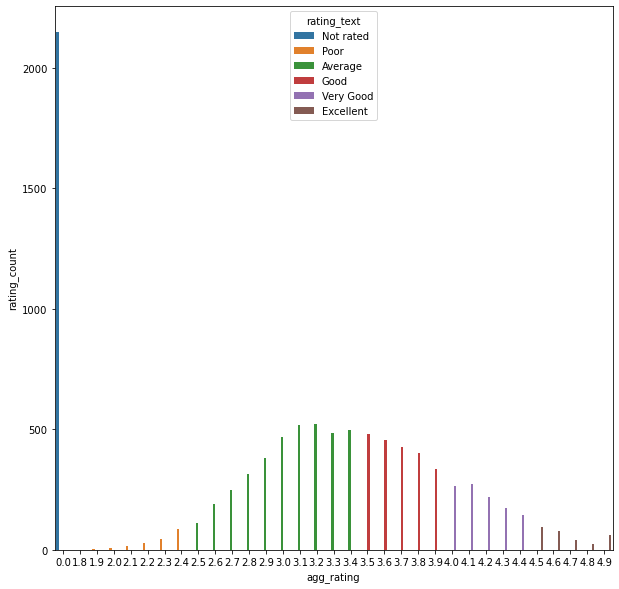

In [126]:
# Bar chart for Aggeregate Rating vs Rating count based on rating_text

plt.figure(figsize=(10,10))
sns.barplot(x= 'agg_rating' , y = 'rating_count' , data = rating , hue = 'rating_text' , )

<AxesSubplot:xlabel='agg_rating', ylabel='rating_count'>

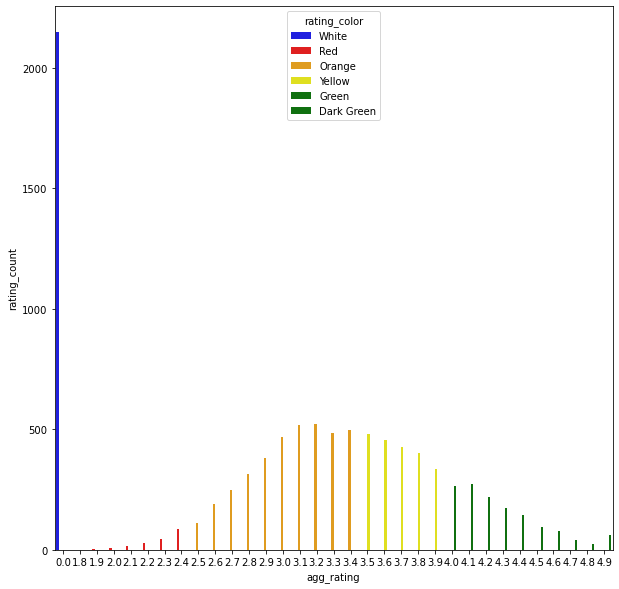

In [129]:
##Adjusting Bar Plot layout with the help hue() & palette() properties.

plt.figure(figsize=(10,10))
sns.barplot(x = 'agg_rating', y = 'rating_count',hue ='rating_color' ,data= rating, palette =['blue', 'red','orange','yellow','green','green'])

<AxesSubplot:xlabel='rating_color', ylabel='rating_count'>

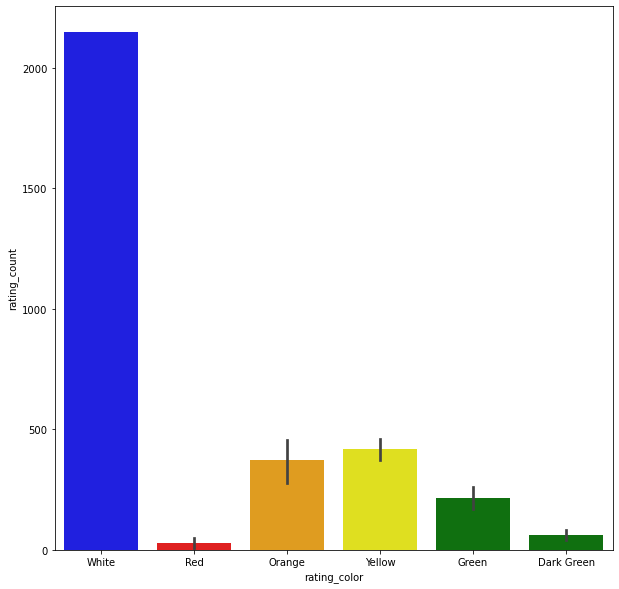

In [132]:
# Count Plot based on ratings: 

plt.figure(figsize=(10,10))
sns.barplot(x='rating_color', y = 'rating_count', data = rating, palette =['blue', 'red','orange','yellow','green','green'])

Observation:   
  * There are __2148__ non rated entries. 
  * Max ratings are between 2.5-3.5 i.e. Averagely Rated

In [134]:
df_zomato.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'City', 'Locality',
       'Cuisines', 'average_cost_two', 'Currency', 'table_booking',
       'online_delivery', 'is_delivering_now', 'switch_to_order',
       'price_range', 'agg_rating', 'rating_color', 'rating_text', 'Votes',
       'Country'],
      dtype='object')

## Factors affecting votes recieved by restaurants 
Votes are the number of individual ratings that are given to restaurants.

#### 1. Votes
- How many restaurants offer Online Delivery to their customers?
- Is there difference in average number of votes recieved by restaurant offering online delivery vs restaurant not offering online delivery?

In [168]:
Total_Restaurants_Delivery=df_zomato.groupby("online_delivery").agg(Total_Restaurants=("restaurant_id","count"))
Avg_Votes=df_zomato.groupby("online_delivery").agg(Average_Votes=("Votes","mean"))

In [171]:
fig2=make_subplots(rows=1, cols=2,
                   specs=[[{"type":"domain"},{"type":"bar"}]],
                   subplot_titles=('Percentage Of Restaurants Offering Delivery','Average Votes vs Online Delivery') ,horizontal_spacing=0.3)

fig2.add_trace(go.Pie(labels=Total_Restaurants_Delivery.index,
                      values=Total_Restaurants_Delivery.Total_Restaurants,
                      hovertemplate ="%{label}<br>Restaurant Count:%{value}",
                      hoverinfo=None,
                      texttemplate = "%{label}<br>%{percent}",
                      marker=dict(colors=["orangered","lightgreen"]),
                      showlegend=True),row=1,col=1)

fig2.add_trace(go.Bar(x=Avg_Votes.index,
                      y=Avg_Votes["Average_Votes"],
                     hovertemplate ="%{label}<br>Average Votes:%{value}",
                     texttemplate = "Average Votes<br>%{value}",
                     marker=dict(color=["orangered","lightgreen"]),
                     showlegend=False),row=1,col=2)

fig2.update_xaxes(title_text="Has Online Delivery?", row=1, col=2)
fig2.update_yaxes(title_text="Average Votes", row=1, col=2)


fig2.update_traces(textfont_size=15)
fig2.update_layout(title_text = 'Graphs showing relation between votes and online delivery',title_font = dict(size=25,family='Verdana', 
                                     color='darkred'), width=800)

__Observation__:  
The majority of restaurants do not offer online delivery facility to their customers. Only 25.7% of restaurants offer this facility to their customers.  
  
__In conclusion, on an average, Restaurants offering online delivery to their customers received more votes than the restaurants which don’t offer one. This could be attributed to multiple reasons.__  
  
One probable reason can be that people ordering food online are more tech-savvy and generally give their review for food they ordered.  
Another reason could be that online food delivery apps prompt their users to review the food they ordered after some time.
Having online delivery facilities could also increase the reach of the restaurants which would result in more people consuming the services of restaurant and voting on the same.
More data would be required to confirm the reasons behind this situation.

#### 2. Table Booking
- How many restaurants offer Table Booking to their customers?
- Is there difference in average number of votes recieved by restaurant offering Table Booking vs restaurant not offering online delivery?

In [172]:
Total_Restaurants_Booking=df_zomato.groupby("table_booking").agg(Total_Restaurants=("restaurant_id","count"))
Avg_Votes_Booking=df_zomato.groupby("table_booking").agg(Average_Votes=("Votes","mean"))

In [175]:
fig2=make_subplots(rows=1, cols=2,
                   specs=[[{"type":"domain"},{"type":"bar"}]],
                   subplot_titles=('    Percentage Of Restaurants Offering Table Booking','Average Votes vs Table Booking'), horizontal_spacing=0.3)

fig2.add_trace(go.Pie(labels=Total_Restaurants_Booking.index,
                      values=Total_Restaurants_Booking.Total_Restaurants,
                      hovertemplate ="%{label}<br>Restaurant Count:%{value}",
                      hoverinfo=None,
                      texttemplate = "%{label}<br>%{percent}",
                      marker=dict(colors=["orangered","lightgreen"]),
                      showlegend=True),row=1,col=1)

fig2.add_trace(go.Bar(x=Avg_Votes_Booking.index,
                      y=Avg_Votes_Booking["Average_Votes"],
                     hovertemplate ="%{label}<br>Average Votes:%{value}",
                     texttemplate = "Average Votes<br>%{value}",
                     marker=dict(color=["orangered","lightgreen"]),
                     showlegend=False),row=1,col=2)

fig2.update_xaxes(title_text="Has Table Booking?", row=1, col=2)
fig2.update_yaxes(title_text="Average Votes", row=1, col=2)

fig2.update_traces(textfont_size=15)
fig2.update_layout(title_text = 'Graphs showing relation between votes and Table Booking',
                   title_font = dict(size=25,family='Verdana', color='darkred'),width=800)

Only __12.10%__ of restaurants offer Table Booking to their customers. Majority of restaurants do not have facility to reserve table for their customers. However, Restaurants offering table booking received significantly more votes than the ones who don’t offer this service. We can infer this from the above visuals.

#### 3. Total Number Of Cuisines
We will see if having more cuisines could affect the number of votes recieved by an restaurants. First we will need to write a logic so that we can count the number of cuisines each restaurant has.

In [179]:
df_zomato["Total_Cuisines"]=df_zomato.apply((lambda x: len(str(x["Cuisines"]).split(','))),axis=1)

In [180]:
df_zomato["Total_Cuisines"].value_counts()

2    3444
1    3403
3    1840
4     584
5     164
6      74
7      28
8      14
Name: Total_Cuisines, dtype: int64

As we can see that restaurants that have 6 or more cuisines are very less in number. We will merge this segment into one so that insights that we gain from this are more statistically significant and not skewed in one direction because of few bad restaurants or few good restaurants.

In [181]:
df_zomato["Total_Cuisines"]=df_zomato.apply(lambda x: 6 if x["Total_Cuisines"]>5 else x["Total_Cuisines"],axis=1 )
aggTotalCsn=df_zomato.groupby("Total_Cuisines").agg(Avg_Votes=("Votes","mean"),Median_Votes=("Votes","median"))
aggTotalCsn["Cuisines_Number"]=aggTotalCsn.index.astype(str)
aggTotalCsn.loc[6,"Cuisines_Number"]="6 or More"  


fig3= go.Figure(data=[
    go.Bar(name='Average Votes', x=aggTotalCsn.Cuisines_Number, y=aggTotalCsn["Avg_Votes"],
           hovertemplate ="Total Cuisines:%{label}<br>Average Votes:%{value}",hoverinfo=None),
    
    go.Bar(name='Median Votes', x=aggTotalCsn.Cuisines_Number, y=aggTotalCsn["Median_Votes"],
          hovertemplate ="Total Cuisines:%{label}<br>Median Votes:%{value}",hoverinfo=None)])

fig3.update_traces(textfont_size=15)
fig3.update_layout(barmode='group',
                    xaxis=dict(title="Number Of Cuisines" ),
                    yaxis=dict(title="Votes"))
fig3.show()

__Observation:__  
- The average as well as median number of votes increases as the number of cuisines increases. The average number of votes increases from 88 for restaurants offering 1 cuisine to 438 for restaurants offering 6 or more cuisines. One reason could be that restaurants offering multiple cuisines cater more type of people in general, which in turn increases the votes received by them on average.
- We consider both average and median number of votes in our analysis to remove out the scenario where averages become don’t represent populations because of few extreme results. The trend appears to be same for both measures of centrality which provides supports to the above relationship between Total Cuisines and Number of Votes.


## Factors Affecting Restaurants Rating

Restaurant ratings depend on many factors such as Portion Size, Ambience, Waiting Time, and also on different facilities that are provided by restaurants such as Valet Parking, Online Delivery, Table booking etc. We will see if having facilities like online delivery and table booking affect ratings. We will also see if there is a relation between number of cuisines and ratings 
  
    
Aggregate Ratings are the averages of all individual ratings which are given to restaurants. These ratings are measured on the scale of 5. Ratings also have color and text associated with them. We will define the range of different rating colors and rating text in terms of aggregate rating.  

<Figure size 432x432 with 0 Axes>

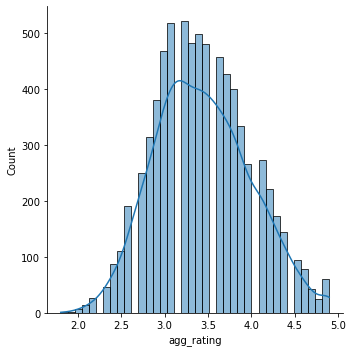

In [182]:
plt.figure(figsize=(6,6))
sns.displot(df_zomato[df_zomato["rating_text"]!="Not rated"]['agg_rating'],kde=True)
plt.show()

#### 1. Does having more variety of Food to eat affect the restaurant Ratings.?

In the following code we will group the restaurants based on total number of cuisines they are serving and then find proportion of restaurants in different rating segments for each group. We plot this information on a stacked bar graph.

In [218]:
df_zomato["Total_Cuisines"]=df_zomato.apply(lambda x: 6 if x["Total_Cuisines"]>5 else x["Total_Cuisines"],axis=1 )
aggTotalCsn=df_zomato.groupby("Total_Cuisines").agg(Avg_Votes=("Votes","mean"),Median_Votes=("Votes","median"))
aggTotalCsn["Cuisines_Number"]=aggTotalCsn.index.astype(str)
aggTotalCsn.loc[6,"Cuisines_Number"]="6 or More"


aggTotalCsnR=df_zomato[df_zomato["rating_text"]!="Not rated"].groupby(["Total_Cuisines","rating_text"]).agg(Restaurant_Count=("restaurant_id","count")).reset_index()
aggTotalCsnR["Cuisines_Number"]=aggTotalCsnR.apply(lambda x: str(x["Total_Cuisines"]) if x["Total_Cuisines"]<6 else "6 or more",axis=1)

In [219]:
x1=aggTotalCsnR.Cuisines_Number.unique()
aggTotalCsnR=aggTotalCsnR.set_index(["Total_Cuisines","rating_text"])
fig4=go.Figure()

fig4.add_trace(go.Bar(name="Poor",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Poor"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="red"),
                      width=[0.6]*6,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Average",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Average"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100,marker=dict(color="orange"),
                      width=[0.6]*6,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Good",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Good"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="yellow"),
                      width=[0.6]*6 ,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Very Good",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Very Good"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="lightgreen"),
                      width=[0.6]*6,
                      hoverinfo=None))

fig4.add_trace(go.Bar(name="Excellent",
                      x=x1,
                      y=(np.array(aggTotalCsnR["Restaurant_Count"][:,"Excellent"])/np.array(aggTotalCsnR["Restaurant_Count"].groupby("Total_Cuisines").sum()))*100, 
                      marker=dict(color="darkgreen"),
                      width=[0.6]*6,
                      hoverinfo=None))
fig4.add_trace(                             
    go.Scatter(                          
    x=x1,
    y=df_zomato[df_zomato["rating_text"]!="Not rated"].groupby(["Total_Cuisines"]).agg(Avg=("agg_rating","mean"))["Avg"],
    name="Average Rating",
    mode='lines',                                        
    line = dict(color='blue', width=3),   
    yaxis="y2" ),                        
    )  
fig4.add_trace(                          
    go.Scatter(                          
    x=x1,
    y=df_zomato[df_zomato["rating_text"]!="Not rated"].groupby(["Total_Cuisines"]).agg(Median=("agg_rating","median"))["Median"],
    name="Median Rating",
    mode='lines',                                                       
    line = dict(color='lightblue', width=3),   
    yaxis="y2" ),                        
    ) 
fig4.update_layout(barmode='stack',
                   title="Percentage of Restaurants in different Rating Segments vs Number of Cuisines",
                   xaxis=dict(title="Number Of Cuisines" ),
                   yaxis=dict(title="Percent Of Restaurants"),
                   yaxis2=dict(title="Ratings", anchor="x", overlaying="y",side="right",range=(0,5.25)),
                   legend = dict(x = 1.05, y = 1))
fig4.show()

As the total number of cuisines offered by the restaurant increases, the propotion of restaurant which have an above average rating in that group also increases. For example, around 75% of restaurants that offered 6 cuisines or more received an above average ratings.

The Median and Average Ratings doesn't increase significantly. For example, the average rating increases from 3.29 for restaurants offering 1 cuisine to 3.71 for restaurants 6 or more cuisines. 

From this we can make an calculated hypothesis that _if an restaurants has more cuisine it is more likely that it will have an above average rating._

#### 2. Total Restaurant count for different Rating Segments

In [220]:
tempdata=df_zomato.groupby("rating_text").agg(count=("restaurant_id","count"))
fig5=go.Figure()
fig5.add_trace(go.Bar(x=tempdata.index,
                      y=tempdata["count"],
                     hovertemplate ="Restaurant Count:%{value}",
                     texttemplate = "Restaurant Count<br>%{value}",
                     marker=dict(color=["orange","darkgreen","yellow","lightgray","red","lightgreen"])))
fig5.update_layout( xaxis=dict(title="Rating Text" ),
                    yaxis=dict(title="Number of Restaurants"))

#### 3. Location of 'Not Rated' Restaurants

In [224]:
Total_Restaurants_Not_Rated=df_zomato[df_zomato["rating_text"]=="Not rated"].groupby("City").agg(Total_Restaurants=("restaurant_id","count"))

In [225]:
fig6=go.Figure(go.Pie(labels=Total_Restaurants_Not_Rated.index,
                      values=Total_Restaurants_Not_Rated.Total_Restaurants,
                      hovertemplate ="%{label}<br>Restaurant Count:%{value}",
                      hoverinfo=None,
                      texttemplate = "%{label}<br>%{percent}",
                      showlegend=True,
                      hole=0.5))
fig6.update_layout(title_text = 'Cities Having Not Rated Restaurants',
                   title_font = dict(size=25,family='Verdana',color='darkred'),
                   annotations=[dict(text='Total Number of Restaurants:<br>'+str(Total_Restaurants_Not_Rated.sum()[0]), x=0.5, y=0.5, font_size=12, showarrow=False)],width=600)
fig6.show()

#### 4. Is there a relationship between Average cost and Ratings?

In [229]:
fig7= px.scatter(df_zomato[df_zomato["rating_text"]!="Not rated"], x='average_cost_two', y='agg_rating',
                color = 'rating_text',
                )
fig7.show()

__Observation:__  
  
* Having Variety of food has a slight effect on the ratings.
* Most Resturants are rated as Average , and there are 2184 resturants that are not rated.
* New Delhi is the City with most non rated returants
* Average Cost is High For Very Good rated resturants and so on so Avg Cost is directly proportional to rating
    

## THANK YOU  
                                                                                         Performed by : Ankit Dubey